# Hoi quy nhi phan

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
plt.style.use('seaborn-white')

### Load dataset

In [2]:
df = pd.read_csv('Data/Default.csv')
df['student2'] = df.student.factorize()[0]
df['default2'] = df.default.factorize()[0]
df=df.drop(['default','student'],axis=1)
df.head(3)

,balance,income,student2,default2
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,1,0
2,1073.549164,31767.138947,0,0


In [3]:
x=df['balance']
x=x/x.max()
y=df['default2']

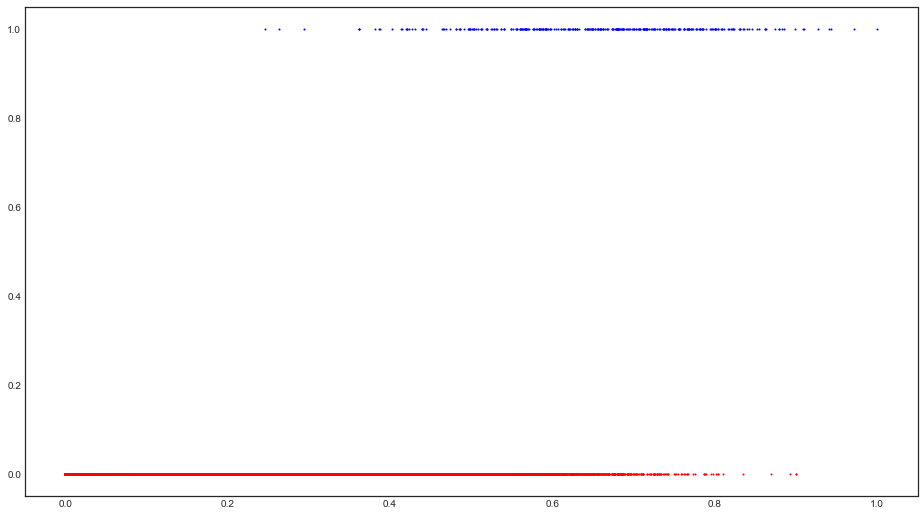

In [4]:
plt.figure(figsize=(16,9))
id0=y==0
id1=y==1
plt.scatter(x[id0],y[id0],c='red',s=1)
plt.scatter(x[id1],y[id1],c='blue',s=1)
plt.show()

In [5]:
x=x.values.reshape(-1,1)
x.shape

(10000, 1)

In [6]:
model = LogisticRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_[0])

[-8.80979582]
[11.50181457]


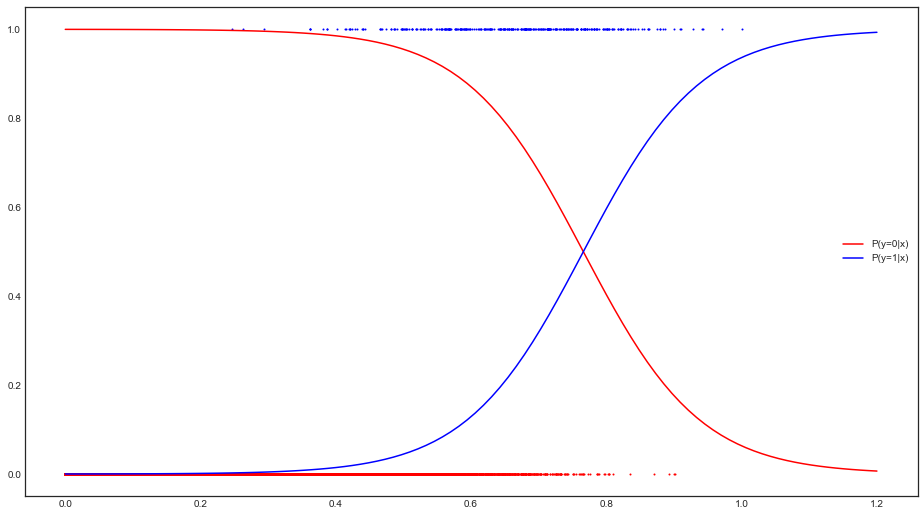

In [7]:
plt.figure(figsize=(16,9))
id0=y==0
id1=y==1
plt.scatter(x[id0],y[id0],c='red',s=1)
plt.scatter(x[id1],y[id1],c='blue',s=1)
xx=np.linspace(0,1.2,100).reshape(-1,1)
yy=1/(1+np.exp(model.intercept_+model.coef_[0][0]*xx))
plt.plot(xx,yy,c='red',label='P(y=0|x)')
plt.plot(xx,1-yy,c='blue',label='P(y=1|x)')
plt.legend(loc='best')
plt.show()

In [8]:
y_pred=model.predict(x)

In [9]:
confusion_matrix(y, y_pred)

array([[9647,   20],
       [ 262,   71]], dtype=int64)

<Figure size 576x576 with 0 Axes>

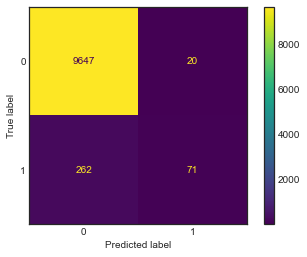

In [10]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model,x,y)
plt.show()

In [11]:
pred_prob = model.predict_proba(x)

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y, pred_prob[:,1], pos_label=1)


In [13]:
from sklearn.metrics import roc_auc_score
# auc scores
auc_score = roc_auc_score(y, pred_prob[:,1])
auc_score

0.9479784946837808

In [14]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

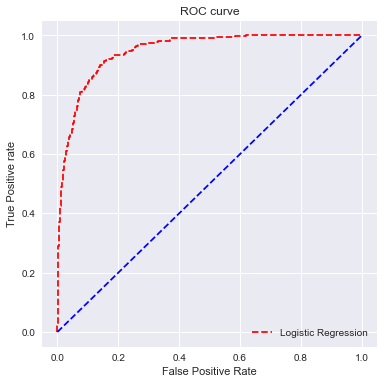

In [15]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(6,6))
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [16]:
pred_prob = model.predict_proba(x)[:,1]

In [17]:
cut_off=np.linspace(0,1,11)
cut_off

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [18]:
CM=[]
for cutpoint in cut_off:
    y_pred=pred_prob>=cutpoint
    cm=confusion_matrix(y, y_pred)
    CM.append(cm.flatten())

In [19]:
df=pd.DataFrame(CM,columns=['TP','FN','FP','TN'])
df

,TP,FN,FP,TN
0,0,9667,0,333
1,9089,578,85,248
2,9436,231,141,192
3,9577,90,195,138
4,9625,42,233,100
5,9647,20,262,71
6,9658,9,293,40
7,9663,4,313,20
8,9664,3,325,8
9,9667,0,331,2


In [20]:
df['TPR']=df['TP']/(df['TP']+df['FN'])
df['FPR']=df['FP']/(df['FP']+df['TN'])

In [21]:
df

,TP,FN,FP,TN,TPR,FPR
0,0,9667,0,333,0.000000,0.000000
1,9089,578,85,248,0.940209,0.255255
2,9436,231,141,192,0.976104,0.423423
3,9577,90,195,138,0.990690,0.585586
4,9625,42,233,100,0.995655,0.699700
5,9647,20,262,71,0.997931,0.786787
6,9658,9,293,40,0.999069,0.879880
7,9663,4,313,20,0.999586,0.939940
8,9664,3,325,8,0.999690,0.975976
9,9667,0,331,2,1.000000,0.993994


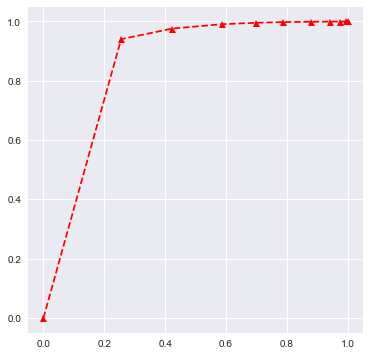

In [22]:
plt.figure(figsize=(6,6))
plt.plot(df['FPR'],df['TPR'],marker='^',c='red',linestyle='--')
plt.show()

# Multiple logistic regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
df = pd.read_csv('Data/Default.csv')
df['student2'] = df.student.factorize()[0]
df['default2'] = df.default.factorize()[0]
df=df.drop(['default','student'],axis=1)
df.head(3)

,balance,income,student2,default2
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,1,0
2,1073.549164,31767.138947,0,0


In [25]:
X=df[['balance','income','student2']].values
y=df['default2'].values
print(X.shape,y.shape)

(10000, 3) (10000,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model = LogisticRegression().fit(X_train, y_train)

In [28]:
print(model.intercept_,model.coef_)

[-2.92273069] [[ 4.10824216e-03 -1.35591924e-04 -3.80773860e+00]]


In [29]:
print(model.score(X_train,y_train).round(4),model.score(X_test,y_test).round(4))

0.9664 0.9683


In [31]:
p_test=model.predict_proba(X_test)[:,1]
p_train=model.predict_proba(X_train)[:,1]

In [32]:
cut_off=np.linspace(0,1,11)
CM_test=[]
CM_train=[]
for cutpoint in cut_off:
    y_test_pred=p_test>=cutpoint
    y_train_pred=p_train>=cutpoint
    cm=confusion_matrix(y_test, y_test_pred)
    CM_test.append(cm.flatten())
    cm=confusion_matrix(y_train, y_train_pred)
    CM_train.append(cm.flatten())
    

In [33]:
df_test=pd.DataFrame(CM_test,columns=['TP','FN','FP','TN'])
df_train=pd.DataFrame(CM_train,columns=['TP','FN','FP','TN'])

In [34]:
df_test['TPR']=df_test['TP']/(df_test['TP']+df_test['FN'])
df_test['FPR']=df_test['FP']/(df_test['FP']+df_test['TN'])
df_train['TPR']=df_train['TP']/(df_train['TP']+df_train['FN'])
df_train['FPR']=df_train['FP']/(df_train['FP']+df_train['TN'])

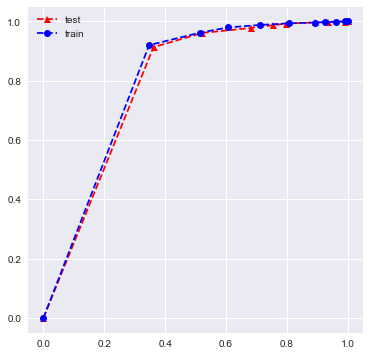

In [35]:
plt.figure(figsize=(6,6))
plt.plot(df_test['FPR'],df_test['TPR'],marker='^',c='red',linestyle='--',label='test')
plt.plot(df_train['FPR'],df_train['TPR'],marker='o',c='blue',linestyle='--',label='train')
plt.legend()
plt.show()

### HỒI QUY ĐA LỚP

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris

In [37]:
X=load_iris().data
y=load_iris().target

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [40]:
b=model.intercept_
w=model.coef_
print(b)
print(w)

[  9.03230326   1.84159457 -10.87389783]
[[-0.39721662  0.96077364 -2.37394406 -1.00318233]
 [ 0.51276148 -0.25323862 -0.21540628 -0.76913612]
 [-0.11554486 -0.70753502  2.58935034  1.77231845]]


In [41]:
x_test=X_test[0]
z=np.dot(x_test,w.T)+b
print(z)

[-3.06190781  2.32499859  0.73690922]


In [42]:
proba=np.exp(z)/np.sum(np.exp(z))
print(proba)

[0.00378537 0.82720395 0.16901068]


## 4.4 Linear Discriminant Analysis
### Table 4.4 


In [ ]:
X = df[['balance', 'income', 'student2']].values
y = df.default2.values

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

In [ ]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

### Table 4.5
Instead of using the probability of 50% as decision boundary, we say that a probability of default of 20% is to be classified as 'Yes'.

In [ ]:
decision_prob = 0.2
y_prob = lda.fit(X, y).predict_proba(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > decision_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

#  Lab

### 4.6.3 Linear Discriminant Analysis

In [ ]:
df = pd.read_csv('Data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)

In [ ]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

In [ ]:
lda.priors_

In [ ]:
lda.means_

In [ ]:
# These do not seem to correspond to the values from the R output in the book?
lda.coef_

In [ ]:
confusion_matrix(y_test, pred).T

In [ ]:
print(classification_report(y_test, pred, digits=3))

In [ ]:
pred_p = lda.predict_proba(X_test)

In [ ]:
np.unique(pred_p[:,1]>0.5, return_counts=True)

In [ ]:
np.unique(pred_p[:,1]>0.9, return_counts=True)

### 4.6.4 Quadratic Discriminant Analysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [ ]:
qda.priors_

In [ ]:
qda.means_

In [ ]:
confusion_matrix(y_test, pred).T

In [ ]:
print(classification_report(y_test, pred, digits=3))

### 4.6.5 K-Nearest Neighbors

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))

### 4.6.6 An Application to Caravan Insurance Data

#### K-Nearest Neighbors

In [ ]:
# In R, I exported the dataset from package 'ISLR' to a csv file
df = pd.read_csv('Data/Caravan.csv')
y = df.Purchase
X = df.drop('Purchase', axis=1).astype('float64')
X_scaled = preprocessing.scale(X)

X_train = X_scaled[1000:,:]
y_train = y[1000:]
X_test = X_scaled[:1000,:]
y_test = y[:1000]

def KNN(n_neighbors=1, weights='uniform'):
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    return(pred, score, clf.classes_)

def plot_confusion_matrix(cm, classes, n_neighbors, title='Confusion matrix (Normalized)',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Normalized confusion matrix: KNN-{}'.format(n_neighbors))
    plt.colorbar()
    plt.xticks(np.arange(2), classes)
    plt.yticks(np.arange(2), classes)
    plt.tight_layout()
    plt.xlabel('True label',rotation='horizontal', ha='right')
    plt.ylabel('Predicted label')
    plt.show()

In [ ]:
for i in [1,3,5]:
    pred, score, classes = KNN(i)
    cm = confusion_matrix(y_test, pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized.T, classes, n_neighbors=i)
    cm_df = pd.DataFrame(cm.T, index=classes, columns=classes)
    cm_df.index.name = 'Predicted'
    cm_df.columns.name = 'True'
    print(cm_df)    
    print(pd.DataFrame(precision_score(y_test, pred, average=None),
                       index=classes, columns=['Precision']))        

####  Logistic Regression

In [ ]:
regr = skl_lm.LogisticRegression()
regr.fit(X_train, y_train)

In [ ]:
pred = regr.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=regr.classes_,
                     columns=regr.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))

In [ ]:
pred_p = regr.predict_proba(X_test)
cm_df = pd.DataFrame({'True': y_test, 'Pred': pred_p[:,1] > .25})
cm_df.Pred.replace(to_replace={True:'Yes', False:'No'}, inplace=True)
print(cm_df.groupby(['True', 'Pred']).size().unstack('True').T)
print(classification_report(y_test, cm_df.Pred))